# <span style="color:red"> Lezione 9 </span>

## <span style="color:green"> Esercizio 9.1 </span>

Alcune funzione di mutazione non sono perfettamente randomiche. Questa scelta è stata fatta con lo scopo di semplificare la programmazione ed evitare eventuali errori.

* `Mutation2` --> lo shift non è di +n dove n è randomico, ma ho scelto si porlo uguale a 1
* `Mutation3` --> scelgo un indice tra (1,26) e permuto le prime cinque città da tale indice con le successive in questo modo: $$1<-->10; 2<-->9; ...; 5<-->6$$

La conseguenza di questa scelta è che l'algoritmo sarà meno ergodico. Per ovviare a ciò si può, però, aumentare il numero di individui (ben consapevole che ciò comporta un costo computazionale maggiore). 

Per quanto riguarda i tempi lungi di esecuzione del programma, potrei pensare al posto di scambiare i valori, ma lavorare sugli indirizzi. Un'altra possibilità è andare a rivedere le mutazioni e crossing over per un codice più intelligente.

La scelta di non imporre degli early-stop è dettata dal fatto che il programma ha una lenta convergenza e pertanto il valore di best fitness può "ristagnare" per numerose generazioni. Di conseguenza il numero di generazioni è stato scelto dopo una serie di prove che hanno portato migliorare sempre più il `best path`. Per la circonferenza, siccome, mi aspettavo quale fosse il cammino più breve (lungo tutto il bordo) ho aumentato le generazioni fino ad ottenerlo. Non ho potuto fare la stessa cosa per il quadrato, per il quale ho aumentato `generations` fino ad avere un cammino che non si incocrociasse con se stesso((caso che ho ritenuto fosse il migliore).ta

La popolazione è generata casualmente e poi tramite la funzione `In_Fitness_order(x,y)` viene riordinata. Quindi il `vector<Individual> individuals` viene ordinato dall'individuo meno fit a quello più fit.

Per la costruzione delle nuove generazioni il processo è (con N individui):

(1) Prendo i primi N/4 migliori individui (in base al fitness, quindi saranno gli ultimi N/4 individui), passandoli immutati. Questo procedimento è fatto con lo scopo di preservare la migliore parte di popolazione e quindi garantirsi che il il fitness del fittest non aumenti.

(2) Prendo i restanto 3/4 di popolazione e li passo mutantoli (in base alla probabilità) con le 5 possibiltà. L'individuo che si va a far mutare è scelto in modo casuale le mutazioni, mentre per i genitori del crossing over si usa `selection`.
    
(Con lo scopo di evitare che la popolazione presenti individui tutti uguali dopo poche generazioni, uso la funzione `Is_new_son` che mi dice se l'individuo mutato è già presente o meno nella nuova generazione e in base a ciò non lo inserisco oppure lo inserisco in essa. Andrebbe forse migliorato). 

#### <span style="color:blue">32 cities randomly placed on a circumference</span>

* Cities config

In [1]:
import numpy as np
import matplotlib.pyplot as plt

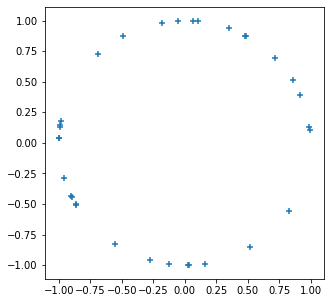

In [33]:
N, X, Y = np.loadtxt("9.1/data/Cities_config_Circ.0", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, marker='+')

* Best path

2000 individui con 1200 generazioni

In [34]:
B_city, B_X, B_Y = np.loadtxt("9.1/data/Best_indiv_circ.0", usecols=(0,1,2), delimiter=' ', unpack='true')

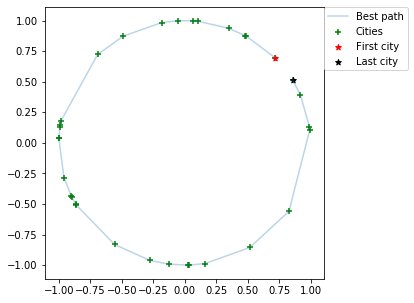

In [35]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, marker='+', color='green', label='Cities')
plt.plot(B_X, B_Y,alpha=0.3, label='Best path')
plt.scatter(B_X[0],B_Y[0],marker='*', color='red', label='First city')
plt.scatter(B_X[len(X)-1],B_Y[len(X)-1],marker='*', color='black', label='Last city')
plt.legend(loc=(1,0.767))

* $\langle L^{(2)}\rangle$ averaged on the best half of the population

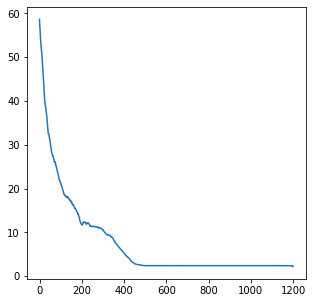

In [37]:
N_gene, L2 = np.loadtxt("9.1/data/Ave_half_circ.0", usecols=(0,1), delimiter=' ', unpack='true')
fig = plt.figure(figsize=(5,5))
plt.plot(N_gene, L2)

#### <span style="color:blue">32 cities randomly placed inside a square</span>

* Cities config

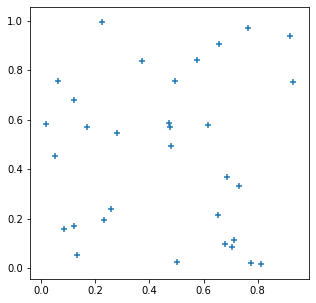

In [45]:
N, X, Y = np.loadtxt("9.1/data/Cities_config_Square.0", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, marker='+')

* Best path

5000 individui con 600 generazioni

In [46]:
B_city, B_X, B_Y = np.loadtxt("9.1/data/Best_indiv_square.0", usecols=(0,1,2), delimiter=' ', unpack='true')

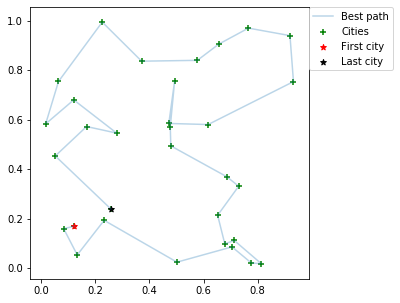

In [47]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X, Y, marker='+', color='green', label='Cities')
plt.plot(B_X, B_Y,alpha=0.3, label='Best path')
plt.scatter(B_X[0],B_Y[0],marker='*', color='red', label='First city')
plt.scatter(B_X[len(X)-1],B_Y[len(X)-1],marker='*', color='black', label='Last city')
plt.legend(loc=(1,0.767))

* $\langle L^{(2)}\rangle$ averaged on the best half of the population

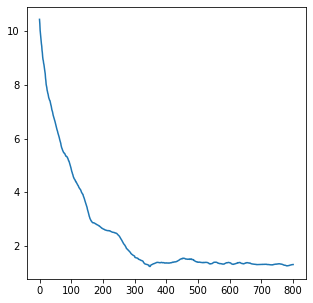

In [48]:
N_gene, L2 = np.loadtxt("9.1/data/Ave_half_square.0", usecols=(0,1), delimiter=' ', unpack='true')
fig = plt.figure(figsize=(5,5))
plt.plot(N_gene, L2)